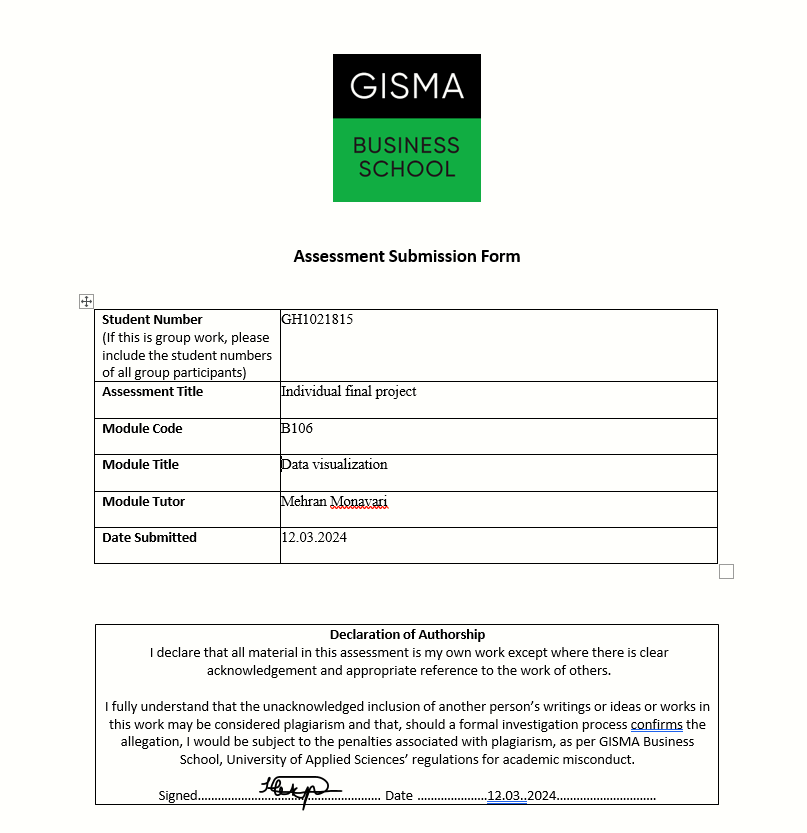

In [27]:
from IPython.display import Image, display

display(Image(filename='Assesment submission form.PNG'))

##Business and data visualization context

#Data

Dataset consists of a data from three different branches of one supermarket. Three monthes of this data is presented.


**Attribute information(only columns that will be used explained):**

Branch : Branch, in which purchase were made(only three)

Gender: Gender of a customer(Male/Female)

Product line: Type of a product purchased

Total: Price with tax

Time: Time of purchase

Rating: Rating received by a customer

#Bussiness Problem


Owner of those 3 branches wants to increase his sales. Also he is thinking about renovations for them, and want to know more which colors needs to be chosen and how to choose the right products for each branch.

#Idea

For each branch I will try to find among which gender it is more popular.I will also investigate relationship between gender and type of purchased products.

##Data exploration

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot


Immporting modules

In [2]:
df = pd.read_csv("supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Reading dataset

In [3]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

Exploring types of each variable. Date and time format should be changed.

In [4]:
missing_values_count = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values_count)

Missing Values in Each Column:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


No missing values, means dataset is clean and ready to use

In [5]:
duplicate_rows = df.duplicated()
duplicate_rows_count = duplicate_rows.sum()
print("Duplicated rows:", duplicate_rows_count)

Duplicated rows: 0


No duplicated rows

In [6]:
stats = df.describe()
print(stats)

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875   

Some preliminary insights of a data for easier further visualization

In [7]:
df.shape

(1000, 17)

Data set consists of 1000 rows. Number of columns will be adjusted

##Data preprocessing

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

In [9]:
df['month'] = df['Date'].dt.month.astype('object')
df['day'] = df['Date'].dt.day.astype('object')
df['year'] = df['Date'].dt.year.astype('object')
df['Hour'] = df['Time'].dt.hour

Converting Date and Time to correct type. Now we have month 1,2 and 3 as December,February and March respectively

In [10]:
unique_counts = df.agg('nunique')
print(unique_counts)

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
month                         3
day                          31
year                          1
Hour                         11
dtype: int64


**From here we could understand which columns we do not need:**

Only one year,so it could be disregarded

Taxs and cogs are in dependence from total and gross income, so I don't need them

There is only one gross margin percentage, so it will not help in visualization

Date column is adjusted, so also needs to be dropped


In [11]:
df.drop(['Invoice ID', 'gross margin percentage','Date', 'year', 'Tax 5%','cogs' ], axis=1, inplace=True)

In [12]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Time,Payment,gross income,Rating,month,day,Hour
0,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2024-03-12 13:08:00,Ewallet,26.1415,9.1,1,5,13
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2024-03-12 10:29:00,Cash,3.8200,9.6,3,8,10
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2024-03-12 13:23:00,Credit card,16.2155,7.4,3,3,13
3,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2024-03-12 20:33:00,Ewallet,23.2880,8.4,1,27,20
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2024-03-12 10:37:00,Ewallet,30.2085,5.3,2,8,10


##Explanatory data visualization

In [13]:
def add_labels_number():
    rects = plt.gca().patches
    for rec, pop in zip(rects, purchase_count_by_gender_branch['Number of Purchases']):
        h, w = rec.get_height(), rec.get_width()
        x, y = rec.get_x(), rec.get_y()
        plt.gca().text(x + w / 2, y + h, str(pop), ha="center", va="bottom")

def add_labels_total():
    rects = plt.gca().patches
    for rect, pop in zip(rects, total_purchase['Total']):
        h, w = rect.get_height(), rect.get_width()
        x, y = rect.get_x(), rect.get_y()
        plt.gca().text(x + w / 2, y + h, f"{int(pop)}", ha="center", va="bottom")


def remove_ticks():
  plt.tick_params(axis='x',bottom= False)
  plt.tick_params(axis='y',left= False)

def remove_frame():
  for spine in plt.gca().spines.values():
    spine.set_visible(False)
def set_yaxis_step(step):
  plt.yticks(np.arange(0, plt.gca().get_ylim()[1], step))

Functions to make visualizations more clear(decluttering).

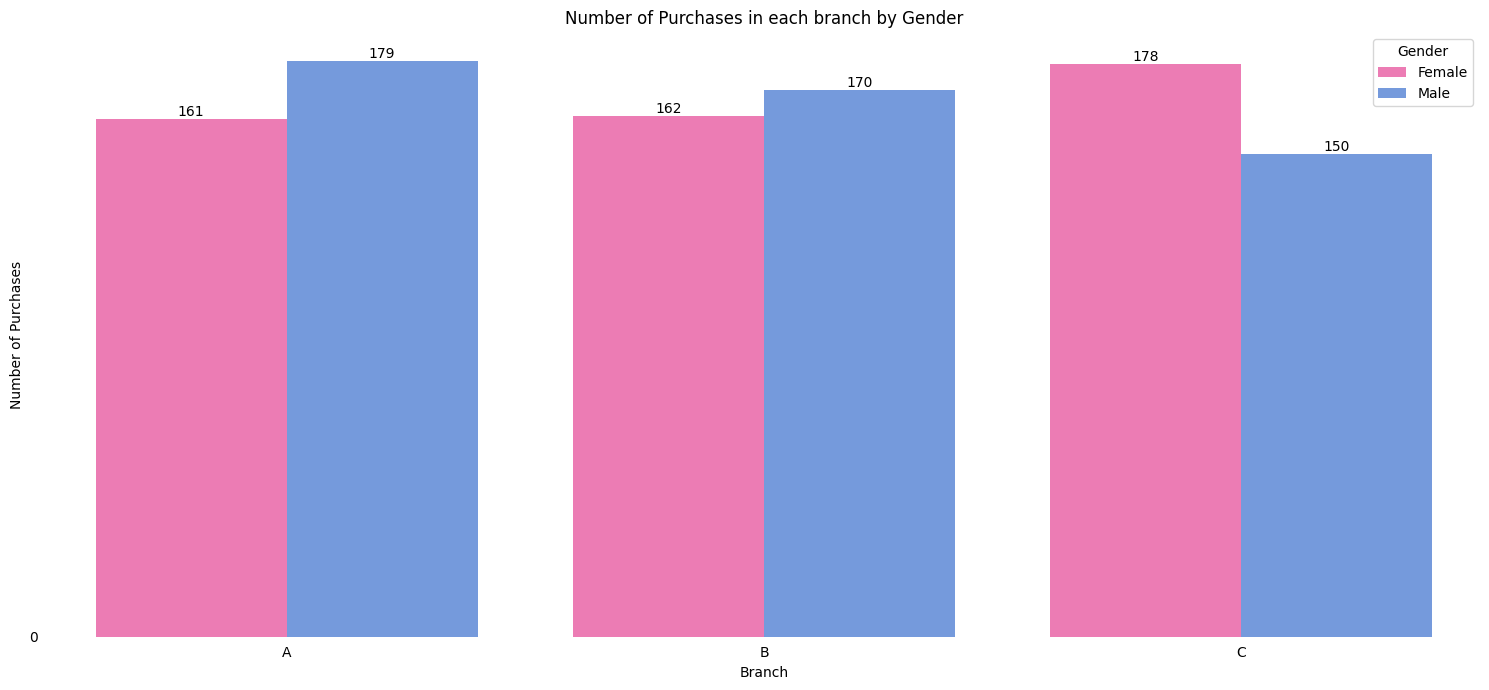

In [14]:
purchase_count_by_gender_branch = df.groupby(['Gender', 'Branch']).size().reset_index(name='Number of Purchases')
Gender_colors = {'Male': '#6495ED', 'Female': '#FF69B4'}
plt.figure(figsize=(15, 7))

sns.barplot(x='Branch', y='Number of Purchases', hue='Gender', data=purchase_count_by_gender_branch, palette=Gender_colors,zorder = 1)
remove_ticks()
remove_frame()
add_labels_number()
set_yaxis_step(200)
plt.title('Number of Purchases in each branch by Gender')
plt.xlabel('Branch')
plt.ylabel('Number of Purchases')
plt.legend(title='Gender')


plt.tight_layout()
plt.show()

This visualization is displaying number of purchases(y-axis) by each gender(color) in each branch(x-axis) we couold see that branch "A" is more popular among males, while "C" among females, so colors for new building should be selected accordingly.For branch "B" further investigations required

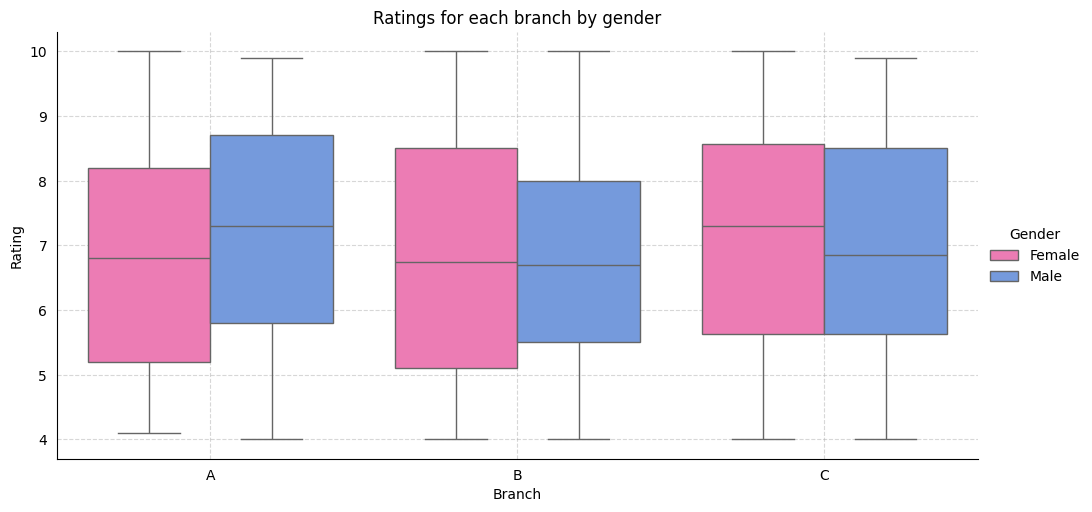

In [18]:
order_y = ['A', 'B', 'C']
sns.catplot(data=df, x='Branch', y='Rating', hue='Gender', kind='box', palette=Gender_colors, height=5, aspect=2,order =order_y )

plt.title("Ratings for each branch by gender")
plt.xlabel("Branch")
plt.ylabel("Rating")
plt.xticks()
remove_ticks()
plt.grid(True, linestyle='--', alpha=0.5)


plt.show()



This visualization is describing rating received by custoemr for each branch. It is again proved that male mostly prefer branch "A", and females branch "C". From the result of two visualizations, I could say that Branch "B" is multi gender and colors for it's renovation should be selected accordingly.

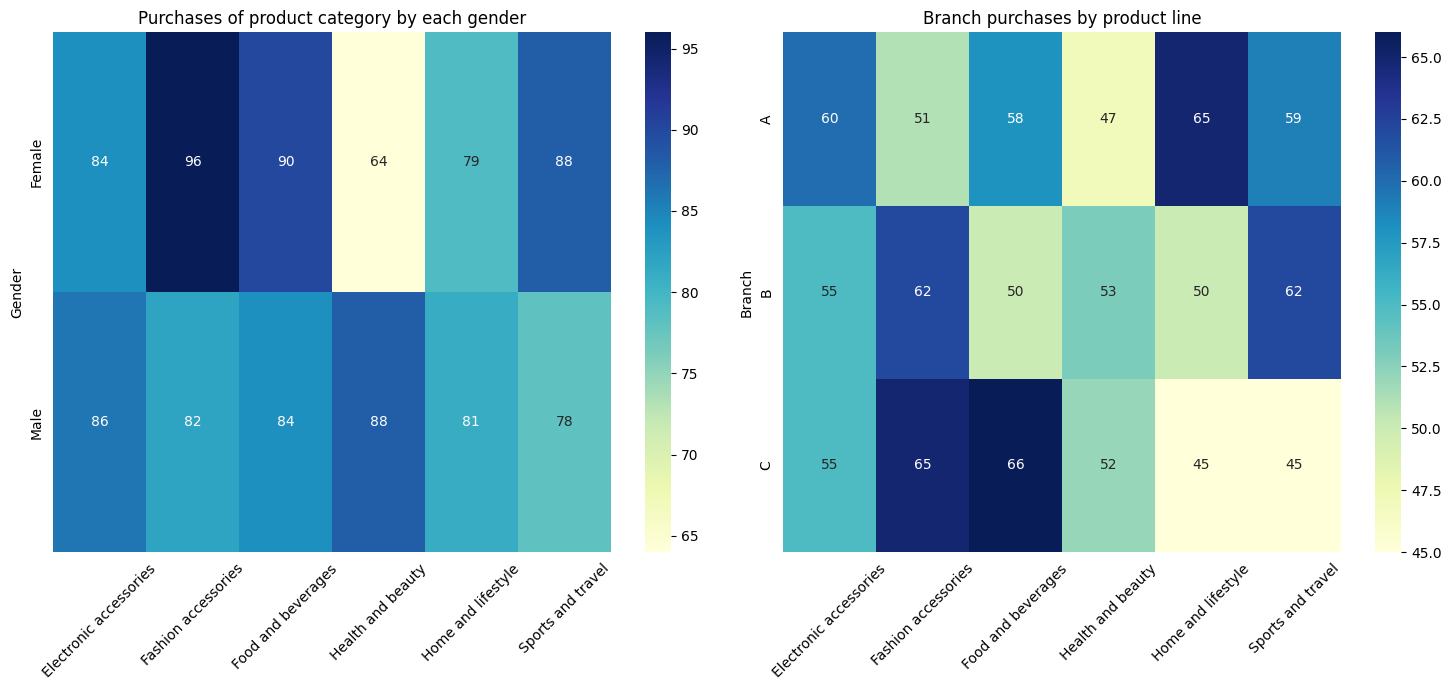

In [20]:
contingency_table_product_line = pd.crosstab(df['Gender'], df['Product line'])
contingency_table_shop = pd.crosstab(df['Branch'], df['Product line'])



plt.figure(figsize=(15, 7))


plt.subplot(1, 2, 1)
sns.heatmap(contingency_table_product_line, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Purchases of product category by each gender")
plt.ylabel("Gender")
plt.xticks(rotation=45)
remove_ticks()
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.heatmap(contingency_table_shop, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Branch purchases by product line")
plt.ylabel("Branch")
plt.xticks(rotation=45)
remove_ticks()
plt.xlabel('')

plt.tight_layout()
plt.show()

This two visualizations are describing number of purchases  for each product line among genders (left heatmap) and among all branches(right heatmap). And from here we can understand which products needs to be placed in each branch.

For branch A: Electronic accessories,Home and lifestyle, Health and beauty.

For Branch B: Nothing should be changed, as I could see that it is selling products related to both genders.

For Branch C: Fashion accessories,Food and Beverages, Sports and Travel.

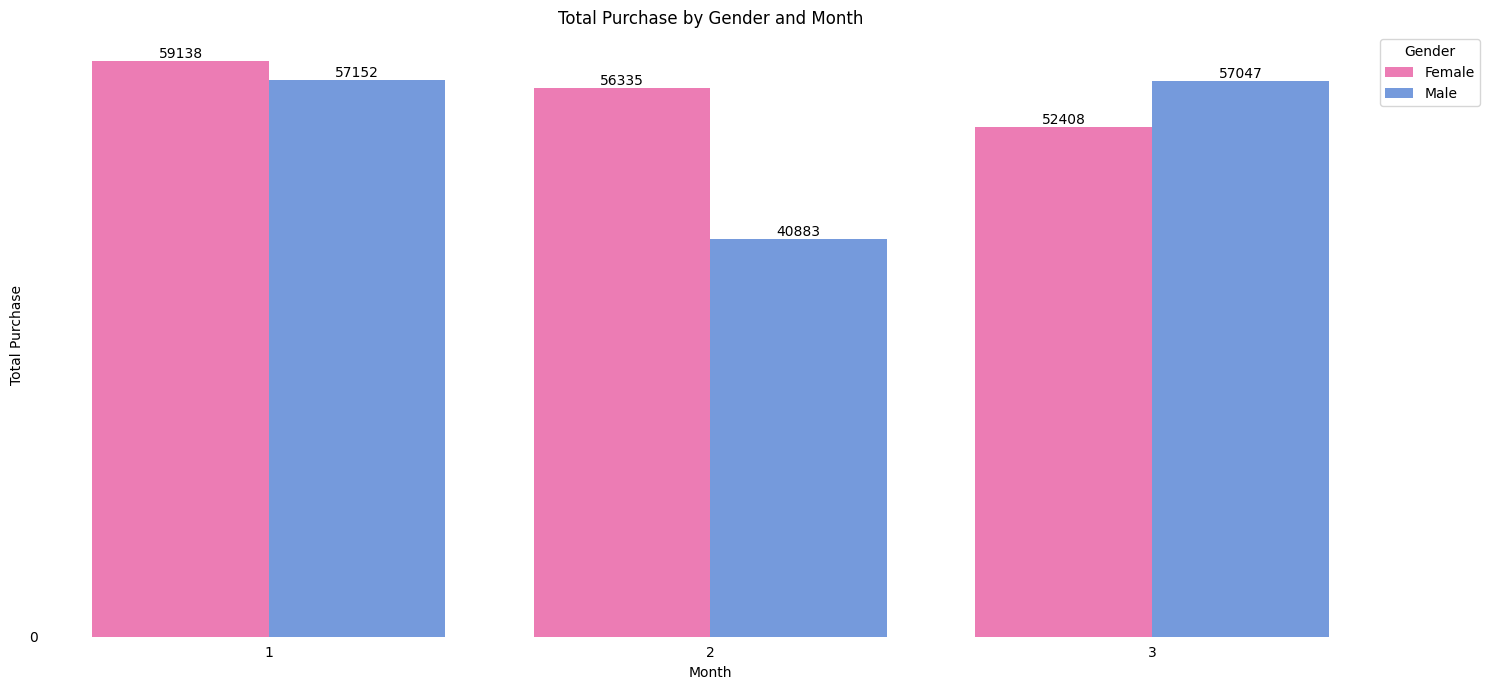

In [19]:
plt.figure(figsize=(15, 7))

total_purchase = df.groupby(['Gender', 'month'])['Total'].sum().reset_index()
sns.barplot(x='month', y='Total', hue='Gender', data=total_purchase, palette=Gender_colors, zorder=1)
plt.title('Total Purchase by Gender and Month')
plt.xlabel('Month')
plt.ylabel('Total Purchase')
plt.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')

remove_ticks()
remove_frame()
add_labels_total()
set_yaxis_step(10000000)
plt.tight_layout()
plt.show()


This visualization is displaying total spendings by each gender in all branches for three monthes. I could see a huge drop in second month in male's purchases, it should be further investigated.

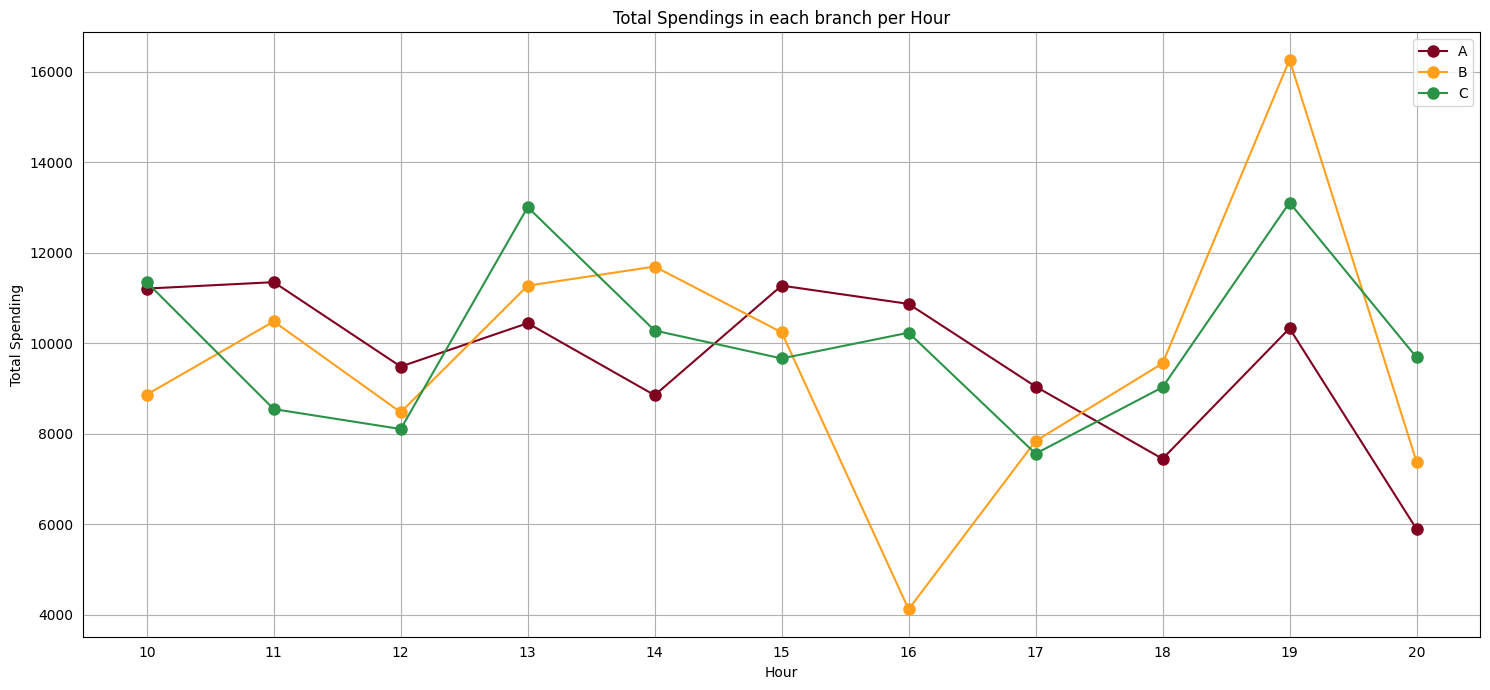

In [30]:
total_per_branch = df.groupby(['Hour', 'Branch'])['Total'].sum().reset_index()


plt.figure(figsize=(15, 7))
branch_colors = {'A': '#800020', 'B':'#FF9F1C', 'C': '#2B9348'}

for branch in total_per_branch['Branch'].unique():
    branch_data = total_per_branch[total_per_branch['Branch'] == branch]
    plt.plot(branch_data['Hour'], branch_data['Total'], label=branch, marker='o',color=branch_colors[branch], markersize=8)

plt.title('Total Spendings in each branch per Hour')
plt.xlabel('Hour')
plt.ylabel('Total Spending')
plt.xticks([10,11,12,13,14,15,16,17,18,19,20])
remove_ticks()
plt.legend()
plt.grid(zorder=0)
plt.tight_layout()
plt.show()


This visualization is describing spendings in each branch during the day. Firstly I could see a huge drop for branch B at 4pm. We should think about providing some discounts at this time in this branch, as this branch is multigender,it should be something like 5% discount for all products.

Then we see that almost for each branch 7pm is the most popular time, and customers usually making purchases at our shop exactly at this time. Additional cashiers needed at this time.
It is also a huge drop after 7pm(at 8 pm) so I would suggest a way to split customers across this 2 hours, to decrease load of workers: **I suggest implementing loyalty program, which will give additional bonuses to our customers if they made purchases at the time,when load of branches is small.**(e.g. Branch B at 4pm, all branches at 8 and 5  pm,branch C at 12 am)

In [35]:
Gender_colors = ['#FF69B4', '#6495ED']
import plotly.io as pio
hour_gender = df.groupby(['Hour', 'Gender']).size().unstack(fill_value=0).reset_index()

fig = px.bar(hour_gender,
             y=['Female', 'Male'],
             x='Hour',
             title='Gender Distribution by Hour',
             color_discrete_sequence=Gender_colors,
             template='plotly',
             labels={'value': 'Number of Purchases'}
            ).update_xaxes(type='category')

pio.write_html(fig, 'gender_distribution_by_hour.html')

[This visualization could not be viewed in html version, so please visit my github in order to view it](https://github.com/nad3261/Datavisualization).

This visualization is showing gender distribution by each hour for all branches.From here it is visible that, females prefer to go to branches between 10 and 13. While for males it is 19 and 15.

##Summary

#Strength


*   Clear visualization of each store  belonging  to a specific gender
*   Understanding of products purchased by each gender
*   Hourly purchase distribution for each branch separately and overall

#Limitations:

*   Not enough real word context(e.g. earthquake, flood,fire) which could affect sales
*   Small interval of time
*   Only 1000 samples

#Insights:



*   Branch A should be considered as "Male" Branch; Branch C as "Female" and B as multigender
*   Huge drop of sales in Branch B at 4pm, and in all branches after 7 pm
*  Second month(February) was really bad for all males, and it needs to be investigated.
* Mean rating for all branches is 7,5. We should do our best to increae it




#Recommendations:

*   Implemment loyalty programm app for bonuses, when purchasing at certain time(considering current visualizations) could be adjusted with new data
*   Choose "Male" colors for branch A(e.g.grey, charcoal, black and brown) and "Female" colors for branch C (e.g.pastels and pale colours, muted dove blues and greens, and soft metallics and pearlescents)
*Products that should be preferable for each branch:

For branch A: Electronic accessories,Home and lifestyle, Health and beauty.

For Branch B: Nothing should be changed, as I could see that it is selling products related to both genders.

For Branch C: Fashion accessories,Food and Beverages, Sports and Travel.
* Think of providing bonuses to our customers for good reviews on google maps, website etc.






#References
1.Pyae, A. (2019) Supermarket sales, Kaggle. Available at: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales (Accessed: 1 March 2024).